# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Dependencias

In [115]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd

Hacer peticiones HTTP

Implementación

In [116]:
url = "https://books.toscrape.com/"

In [117]:
# Realizar la petición GET
response = requests.get(url)

In [118]:
# Verificar el código de estado
print(response)

<Response [200]>


In [119]:
if response.status_code == 200:
    print('Status Code: 200. Exitoso')
    print(response.text[0:15])
else:
    print('Status Code: ', response.status_code)

Status Code: 200. Exitoso
<!DOCTYPE html>


Explorar la estructura HTML con BeautifulSoup

In [120]:
soup = BeautifulSoup(response.text, 'html.parser')

In [121]:
head = soup.find('title')
print(head.get_text(strip=True))

All products | Books to Scrape - Sandbox


In [122]:
# Extraer el título principal
titulo = soup.find('div', class_="col-sm-8 h1")
print(titulo.get_text(strip=True))

Books to ScrapeWe love being scraped!


Extracción de productos, nombre, crecio e imagen

In [123]:
# Buscar todos los productos
productos = soup.select('article.product_pod')

In [124]:
# Lista para almacenar la información
product_list = []

for product in productos:
    # Nombre del libro
    nombre = product.find('h3').find('a')['title']
    print(nombre)

    # Precio
    precio = product.find('p', class_="price_color").get_text()
    print(precio)

    # Imagen
    imagen = product.find('div', class_='image_container').find('img')['src']
    imagen_url = 'https://books.toscrape.com/'+ imagen
    print(imagen_url)

    # Estrellas
    estrellas_elemento = product.find('p', class_="star-rating")
    rating = estrellas_elemento.get('class')[1]
    print(rating)

    pass

    # Agregar los datos al diccionario y luego a la lista
    product_list.append({
        'titulo_libro': nombre,
        'precio': precio,
        'imagen_url': imagen_url,
        'opiniones': rating
    })

A Light in the Attic
Â£51.77
https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
Three
Tipping the Velvet
Â£53.74
https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
One
Soumission
Â£50.10
https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
One
Sharp Objects
Â£47.82
https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
Four
Sapiens: A Brief History of Humankind
Â£54.23
https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
Five
The Requiem Red
Â£22.65
https://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg
One
The Dirty Little Secrets of Getting Your Dream Job
Â£33.34
https://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg
Four
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Â£17.93
https://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c

In [125]:
# Guardar los datos en csv
path_csv = 'resultados/productos.csv'

with open (path_csv, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['titulo_libro', 'precio', 'imagen_url', 'opiniones'])
    writer.writeheader()
    writer.writerows(product_list)
print(f'Extracción completa: {len(product_list)} productos guardados en productos.csv')

Extracción completa: 20 productos guardados en productos.csv


In [126]:
print(product_list)

[{'titulo_libro': 'A Light in the Attic', 'precio': 'Â£51.77', 'imagen_url': 'https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg', 'opiniones': 'Three'}, {'titulo_libro': 'Tipping the Velvet', 'precio': 'Â£53.74', 'imagen_url': 'https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg', 'opiniones': 'One'}, {'titulo_libro': 'Soumission', 'precio': 'Â£50.10', 'imagen_url': 'https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg', 'opiniones': 'One'}, {'titulo_libro': 'Sharp Objects', 'precio': 'Â£47.82', 'imagen_url': 'https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg', 'opiniones': 'Four'}, {'titulo_libro': 'Sapiens: A Brief History of Humankind', 'precio': 'Â£54.23', 'imagen_url': 'https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg', 'opiniones': 'Five'}, {'titulo_libro': 'The Requiem Red', 'precio': 'Â£22.65', 'imagen_url': 'https://books.t

La web escogida tiene varias páginas. Por el momento, sólo se han seleccionado los datos correspondientes a la primera página pero se necesita extraer los datos de todas las páginas.

In [127]:
url_pag= 'https://books.toscrape.com/catalogue/category/books_1/page-{}.html'

In [128]:
# Lista para almacenar la información
product_list_2 = []

# Revisión de las primeras 3 páginas
for page in range(1,51):
    url_f = url_pag.format(page)
    response = requests.get(url_f)
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.select('article.product_pod')


    for product in products:
        title = product.find('h3').find('a')['title']
        price = product.find('p', class_="price_color").get_text()
        image_base = product.find('div', class_='image_container').find('img')['src']
        imagen_url = 'https://books.toscrape.com/'+ image_base
        element_rating = product.find('p', class_="star-rating")
        rating = element_rating.get('class')[1]
        product_list_2.append({
            'titulo_libro': title,
            'precio': price,
            'imagen_url': imagen_url,
            'opiniones': rating
        })
        pass

        # Espera breve entre páginas para simular navegación real
    time.sleep(1)
    print(f'página{page} procesada')

página1 procesada
página2 procesada
página3 procesada
página4 procesada
página5 procesada
página6 procesada
página7 procesada
página8 procesada
página9 procesada
página10 procesada
página11 procesada
página12 procesada
página13 procesada
página14 procesada
página15 procesada
página16 procesada
página17 procesada
página18 procesada
página19 procesada
página20 procesada
página21 procesada
página22 procesada
página23 procesada
página24 procesada
página25 procesada
página26 procesada
página27 procesada
página28 procesada
página29 procesada
página30 procesada
página31 procesada
página32 procesada
página33 procesada
página34 procesada
página35 procesada
página36 procesada
página37 procesada
página38 procesada
página39 procesada
página40 procesada
página41 procesada
página42 procesada
página43 procesada
página44 procesada
página45 procesada
página46 procesada
página47 procesada
página48 procesada
página49 procesada
página50 procesada


Formatos útiles para revisar resultados

In [129]:
# Guardar los resultados en un nuevo csv
with open ('resultados/productos_multi_pag.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['titulo_libro', 'precio', 'imagen_url', 'opiniones'])
    writer.writeheader()
    writer.writerows(product_list_2)
print(f'Extracción completa: {len(product_list_2)} productos guardados en productos_multi_pag.csv')

Extracción completa: 1000 productos guardados en productos_multi_pag.csv


In [130]:
# Transformar datos a DataFrame
pd.set_option('display.max_columns', None)
df = pd.DataFrame(product_list_2)

# Mostrar las primeras filas del DataFrame
print(df.head())

                            titulo_libro   precio  \
0                   A Light in the Attic  Â£51.77   
1                     Tipping the Velvet  Â£53.74   
2                             Soumission  Â£50.10   
3                          Sharp Objects  Â£47.82   
4  Sapiens: A Brief History of Humankind  Â£54.23   

                                          imagen_url opiniones  
0  https://books.toscrape.com/../../../media/cach...     Three  
1  https://books.toscrape.com/../../../media/cach...       One  
2  https://books.toscrape.com/../../../media/cach...       One  
3  https://books.toscrape.com/../../../media/cach...      Four  
4  https://books.toscrape.com/../../../media/cach...      Five  


Limpieza de datos

In [131]:
df['precio'] = df['precio'].str.replace('Â£', '', regex=False)

In [132]:
# Mostrar las primeras filas del DataFrame
print(df.head())

                            titulo_libro precio  \
0                   A Light in the Attic  51.77   
1                     Tipping the Velvet  53.74   
2                             Soumission  50.10   
3                          Sharp Objects  47.82   
4  Sapiens: A Brief History of Humankind  54.23   

                                          imagen_url opiniones  
0  https://books.toscrape.com/../../../media/cach...     Three  
1  https://books.toscrape.com/../../../media/cach...       One  
2  https://books.toscrape.com/../../../media/cach...       One  
3  https://books.toscrape.com/../../../media/cach...      Four  
4  https://books.toscrape.com/../../../media/cach...      Five  


Almacenar datos en SQLite

In [133]:
# Conectar a la base de datos (se crea si no existe)
conn = sqlite3.connect('resultados/productos_multi_pag.db')
cursor = conn.cursor()

In [134]:
# Crear tabla
cursor.execute('''
    CREATE TABLE IF NOT EXISTS libros (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        titulo_libro TEXT,
        precio REAL,
        imagen_url TEXT,
        opiniones TEXT
    )
''')

In [135]:
# Insertar valores del DataFrame
for _, row in df.iterrows():
    cursor.execute('''
        INSERT INTO libros (titulo_libro, precio, imagen_url, opiniones)
        VALUES (?, ?, ?, ?)
    ''', (row['titulo_libro'], row['precio'], row['imagen_url'], row['opiniones']))

In [136]:
conn.commit()  # Guardar cambios en la base de datos
conn.close()   # Cerrar conexión

Representación datos extraídos

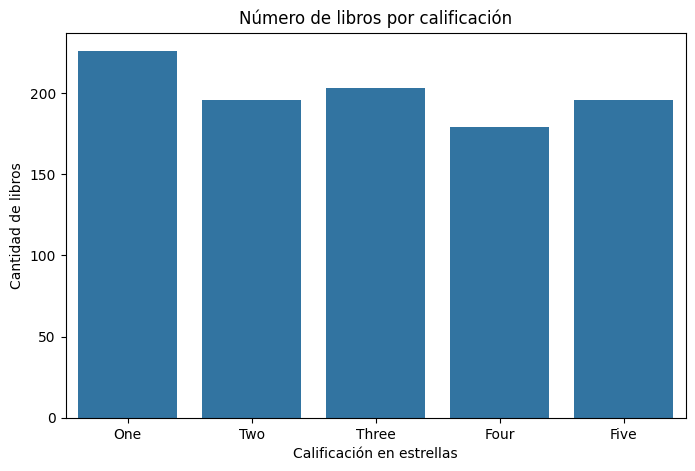

In [137]:
# Cantidad de libros por calificación
plt.figure(figsize=(8,5))
sns.countplot(x=df['opiniones'], order=['One', 'Two', 'Three', 'Four', 'Five'])
plt.xlabel('Calificación en estrellas')
plt.ylabel('Cantidad de libros')
plt.title('Número de libros por calificación')
plt.show()

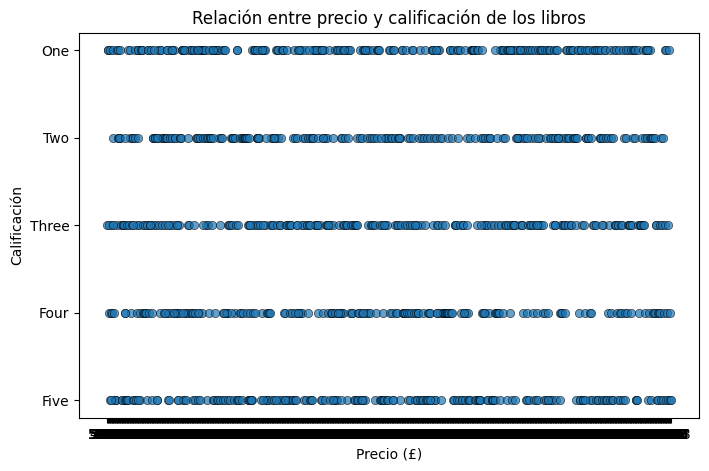

In [138]:
# Relación entre precio y calificación
order = ['One', 'Two', 'Three', 'Four', 'Five']
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['precio'], y=pd.Categorical(df['opiniones'], categories=order, ordered=True),alpha=0.7, edgecolor='black')
plt.xlabel('Precio (£)')
plt.ylabel('Calificación')
plt.title('Relación entre precio y calificación de los libros')
plt.show()

Los precios de los libros están distribuidos de manera similar para todas las calificaciones. Por lo tanto, el gráfico no indica que haya una relación clara entre precio y la valoración. 